In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.constants import m_e, hbar, e, epsilon_0, h

plt.style.use(['science','no-latex'])


In [2]:
def energy_level(n, W):
    return (h**2 * n**2)/(e*8*m_e*W**2)
    

In [4]:
n = np.arange(1,11)

In [5]:
En_3nm = energy_level(n,3e-9)
En_6nm = energy_level(n,6e-9)
En_9nm = energy_level(n,9e-9)

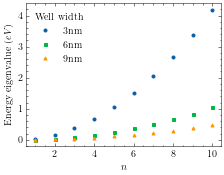

In [6]:
with plt.style.context(['science', 'scatter']):
    fig, ax = plt.subplots()
    ax.plot(n,En_3nm, label='3nm')
    ax.plot(n,En_6nm, label='6nm')
    ax.plot(n,En_9nm, label='9nm')
    ax.legend(title='Well width', loc=2)
    xlbl = r"$n$"
    ylbl = r"Energy eigenvalue $(eV)$"
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)

    fig.savefig('figures/q1_fig.png', dpi=1000)
    plt.show()

In [94]:
#function [W,prob, E,nx_sum, U1, Ec, XX] = 

#def QW_1(a, mu, T, Nout, Nw, E_out):

a = 3e-11
mu = 1
T = 298
Nout = 100
Nw = 100
E_out = 4

#%%%%%%%%%%%%%%Inputs%%%%%%%%%%%%%%%%%%%%%
#% a=3e-11; %mesh size [m] (Default is 30 pm) 3e-11;
#% mu=  ; %Fermi level [eV]
#% T=    ; %Temperature [K]
#% Nout=   ; %Outer passivating layer
#% Nw=   ; %Well width well
#% E_out= ;
#% Poisson-Schrodinger Solver    
#% Iterative solver for semiconductor quantum well structures
#% A Schenk 2015
#% La Trobe University
#% Altered from pre-existing code for PHY5PQA Matlab assignment
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%Outputs%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#% W - Wavefunction
#%Prob - Probability densnity
#% E - Energy Eigenvalue
#% nx_sum - Electron density
#% U1 - Potential
#% Ec - 
#% XX - Position

#%Preset parameters-Do Not Change!
#hbar=1.06e-34; #%Plancks constant [Js]
q= e #1.6e-19; #%Elementary charge [C]
eps0 = epsilon_0 #8.85e-12#; %Permitivity of free space [F/m]
epsr=4; #%Relative permittivity
m=0.25*9.1e-31; #%Effective mass [kg]
k=8.617e-5; #%Boltzmann constant [eV/K]
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#%Calculation parameters-Change these as necessary
Vg=0;# %Gate potential (not used for this calculation)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#%More parameters needed for calculations. Do not change
t0=(hbar**2)/(2*m*(a**2)*q); #%Scaling factor
e0=q*a/eps0 #; %Scaling factor
kT=k*T #; 
n0=m*kT*q/(2*np.pi*(hbar**2)) #; %2D DOS
Np=2*Nout+Nw #; %layer thickness in units of mesh size
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


XX=np.matrix(a*1e9*np.arange(1,Np,1));
Ec=np.matrix(np.concatenate((np.array([E_out*np.ones((Nout,1))]),np.array([0*np.ones((Nw,1))]),np.array([E_out*np.ones((Nout,1))])), axis=None)).T
T=np.matrix((2*t0*np.diag(np.ones(Np)))-(t0*np.diag(np.ones(Np-1),k=1))-(t0*np.diag(np.ones(Np-1),k=-1)));
D2=np.matrix(epsr*((2*np.diag(np.ones((Np))))-(np.diag(np.ones(Np-1),k=1))-np.diag(np.ones(Np-1),k=-1)));
iD2=D2.getI();
Vg=0;
Ubdy=np.matrix(-4*(np.concatenate((np.array([0]),np.zeros(300-2),np.array([0])))))
U0=np.matmul(iD2,Ubdy.T);
U1=np.matrix(1e-9*np.ones([Np,1]));
UU=U1;
change=1;
while change>1e-6:
    U1=U1+0.1*(UU-U1);
    P,D=LA.eig(T+np.diag(Ec)+np.diag(U1));
    D=np.diag(D);
    rho=np.log(1+np.exp((mu-D)/kT));
    rho=P*np.diag(rho)*np.transpose(P)
    n=2*n0*np.diag(rho);
    UU=U0+np.matmul(iD2,n)*e0;
    change=np.amax(abs(UU-U1));
    U=Ec+U1;
    print(change)

ns=1e-4*np.sum(np.sum(n*[[np.zeros([Nout,1])],[np.ones([Nw,1])],[np.zeros([Nout,1])]]))
nn=1e-6*n/a;
W =P[:,x];
prob = W**2
E=D[x]
Occ_x=np.log(1+np.exp((mu-D[x]/kT)))
Ed_x=P[:,x]*Occ_x*np.transpose(P[:,x]);
N_x=2*np.matmul(n0,Ed_x);
nx_sum=1e-4*sum(sum(N_x*[np.ones(Np,1)]))
#return W,prob, E,nx_sum, U1, Ec, XX




246927164.412356
2.944659929563906e+18
2.611461495448862e+38
2.0539061108318243e+78
1.2704995264617474e+158
nan


<ipython-input-94-56953d618219>:72: RuntimeWarning: overflow encountered in multiply
  rho=P*np.diag(rho)*np.transpose(P)
<ipython-input-94-56953d618219>:73: RuntimeWarning: invalid value encountered in multiply
  n=2*n0*np.diag(rho);
<ipython-input-94-56953d618219>:79: RuntimeWarning: invalid value encountered in multiply
  ns=1e-4*np.sum(np.sum(n*[[np.zeros([Nout,1])],[np.ones([Nw,1])],[np.zeros([Nout,1])]]))
<ipython-input-94-56953d618219>:80: RuntimeWarning: invalid value encountered in multiply
  nn=1e-6*n/a;
<ipython-input-94-56953d618219>:80: RuntimeWarning: overflow encountered in true_divide
  nn=1e-6*n/a;


NameError: name 'x' is not defined

In [92]:
np.amax(np.array((abs(UU-U1))))

246927164.412356

In [71]:
iD2.shape

(300, 300)

In [4]:
a = 3e-11
mu = 1
T = 298
Nout = 100
Nw = 100
E_out = 4
W,prob, E,nx_sum, U1, Ec, XX = QW_1(a, mu, T, Nout, Nw, E_out)

TypeError: 'list' object cannot be interpreted as an integer

In [51]:
a = np.ones([10,1])
b = np.ones([10,1])
np.concatenate((a, b), axis=0)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [44]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])